In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import inspect

def retrieve_name(var):
    """
    https://itbloger.tistory.com/1027
    Gets the name of var. Does it from the out most frame inner-wards.
    :param var: variable to get name from.
    :return: string
    """
    for fi in reversed(inspect.stack()):
        names = [var_name for var_name, var_val in fi.frame.f_locals.items() if var_val is var]
        if len(names) > 0:
            return names[0]
        
def printn(x):
    """
    변수의 이름과 변수의 값을 출력하는 함수
    """
    varName = retrieve_name(x)
    print(f"{varName}:{x}")
    
def printt(x):
    """
    변수의 이름과 변수의 데이터 타입을 출력하는 함수
    """
    varName = retrieve_name(x)
    print(f"TYPE-{varName}:{type(x)}")

## 2.3 퍼셉트론 구현하기

### 2.3.1 간단한 구현부터

In [3]:
def AND(x1:float, x2:float) -> int:
    w1, w2, theta = [0.5, 0.5, 0.7]
    if x1*w1 + x2*w2 <= theta:
        return 0
    else:
        return 1
    
assert AND(0, 0) == 0
assert AND(1, 0) == 0
assert AND(0, 1) == 0
assert AND(1, 1) == 1

In [4]:
def NAND(x1:float, x2:float) -> int:
    w1, w2, theta = [-0.5, -0.5, -0.7]
    if x1*w1 + x2*w2 <= theta:
        return 0
    else:
        return 1
    
assert NAND(0, 0) == 1
assert NAND(1, 0) == 1
assert NAND(0, 1) == 1
assert NAND(1, 1) == 0

In [5]:
def OR(x1:float, x2:float) -> int:
    w1, w2, theta = [0.5, 0.5, 0.2]
    if x1*w1 + x2*w2 <= theta:
        return 0
    else:
        return 1
    
assert OR(0, 0) == 0
assert OR(1, 0) == 1
assert OR(0, 1) == 1
assert OR(1, 1) == 1

### 2.3.2 가중치와 편향 도입

In [6]:
x = np.array([0, 1])
# print(f"SHAPE X: {x.shape}")
w = np.array([0.5, 0.5])
# print(f"SHAPE W: {w.shape}")

b = -.7

w*x
# print(f"SHAPE W*X: {w*x.shape}")


if np.sum(w*x) + b <= 0:
    label = 0
else: label = 1
# print(f"LABEL:{label:2d}")

In [7]:
def AND(x1:float, x2:float) -> int:
    x = np.array([x1, x2])
    w = np.array([.5, .5])
    b = -0.7
    
    if np.sum(w*x) + b <= 0:
        return 0
    else:
        return 1
    
assert AND(0, 0) == 0
assert AND(1, 0) == 0
assert AND(0, 1) == 0
assert AND(1, 1) == 1

In [8]:
def NAND(x1:float, x2:float) -> int:
    x = np.array([x1, x2])
    w = np.array([-.5, -.5])
    b = 0.7
    
    if np.sum(w*x) + b <= 0:
        return 0
    else:
        return 1
    
assert NAND(0, 0) == 1
assert NAND(1, 0) == 1
assert NAND(0, 1) == 1
assert NAND(1, 1) == 0

In [9]:
def OR(x1:float, x2:float) -> int:
    x = np.array([x1, x2])
    w = np.array([.5, .5])
    b = -0.2
    
    if np.sum(w*x) + b <= 0:
        return 0
    else:
        return 1
    
assert OR(0, 0) == 0
assert OR(1, 0) == 1
assert OR(0, 1) == 1
assert OR(1, 1) == 1

In [10]:
def XOR(x1:float, x2:float) -> int:
    return AND(NAND(x1, x2), OR(x1, x2))

assert XOR(0, 0) == 0
assert XOR(1, 0) == 1
assert XOR(0, 1) == 1
assert XOR(1, 1) == 0

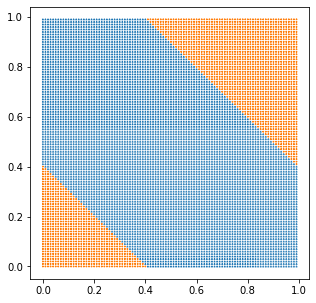

In [11]:
x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)

arr = []
xarr = []
yarr = []
for xs in x:
    for ys in y:
        xarr.append(xs)
        yarr.append(ys)
        arr.append(XOR(xs, ys))

boolarr = list(map(lambda x:bool(x), arr))
nboolarr = list(map(lambda x:not(bool(x)), arr))

plt.figure(figsize=(5, 5))
plt.scatter(xarr, yarr, s=boolarr, marker='^')
plt.scatter(xarr, yarr, s=nboolarr, marker='*')
plt.show()